In [1]:
import sys, os
import numpy as np

In [2]:
parent_dir = os.path.abspath(os.pardir)
libpath = os.path.join(parent_dir, 'c3dp_source')
samplePath = os.path.join(parent_dir, 'sample')

if not libpath in sys.path:
    sys.path.insert(0, libpath)

In [3]:
import optimization_mantidReduction as opt
from c3dp.instrument.sampleassembly import makeSAXML

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:17: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:17: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *


In [4]:
sample_assembly_fileName = 'dac_without_collimator'

Three files are needed to make the sampleassembly file:
    Geometry file (.xml file), 
    unit cell information (.cif file) and 
    scattering kernels file (name-scatterer.xml file) which defines the scattering formula or diffraction peaks

In [5]:
scatterer = {('anvil', 'shapeAnvil', 'anvil', 'C', 'cif'),
            ('gasket_sample', 'shapeGasket', 'gasket_at_sample', 'Fe3Cr', 'cif'),
            ('gasket_anvil', 'shapeGasket2', 'gasket_at_anvil', 'Al', 'xyz'),
            ('seat_piston', 'shapeSP', 'vision_seat_piston', 'Fe3Ni', 'cif'),
            ('bar', 'shapeBar', 'bar', 'Cu', 'cif' ),
            ('sample', 'shapeSample', 'sample_dac', 'Si', 'xyz')
             
            }

# scatterer = { ('anvil', 'shapeAnvil', 'anvil', 'C', 'cif'),
#              ('gasket_sample', 'shapeGasket', 'gasket_at_sample', 'Fe3Cr', 'cif'),
       
             
#             }
makeSAXML(sample_assembly_fileName, scatterer)


()

In [6]:
file_name = 'sampleassembly_'+sample_assembly_fileName+'.xml'

In [7]:
file_name

'sampleassembly_dac_without_collimator.xml'

In [8]:
sample_file= os.path.join(samplePath, file_name)
sample_file

'/home/fi0/Collimator_3D/c3dp/sample/sampleassembly_dac_without_collimator.xml'

In [9]:
!mcvine sampleassembly check {sample_file}

1e-05
1.0
0
0
45.690734375
0
12.17
0
0
1e-05
1.0
0
0
160.149892567
0
1.368
0
0
1e-05
1.0
0
0
45.3892658731
0
0.028
0
0
1e-05
1.0
0
0
66.4178238844
0
0.924
0
0
1e-05
1.0
0
0
46.2358085867
0
10.73
0
0
1e-05
1.0
0
0
47.2377130159
0
15.12
0
0
/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/cli/sampleassembly/check.py:23: UserWarning: For multiple-scattering, `max_multiplescattering_loops_among_scatterers` should be larger than 5.
  warnings.warn("For multiple-scattering, `max_multiplescattering_loops_among_scatterers` should be larger than %s." % nsegments)


In [10]:
cell=opt.PresureCell()
cell.parameters(ncount=1e7,source_file='Neutrons_mcvine.dat', 
                sampleassembly_fileName=sample_assembly_fileName, sourceTosample_z=0.02)

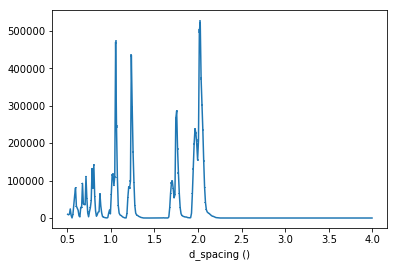

CPU times: user 2min 18s, sys: 1min 28s, total: 3min 47s
Wall time: 8min 35s


In [11]:
%%time
diffraction_pattern_DAC = cell.diffraction_pattern_calculation ()

In [12]:
import mcvine

In [13]:
mcvine.version

'v1.3.3'

In [14]:
import mantid2mcvine

In [15]:
mantid2mcvine.__version__

'0.1.0a3'